In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
oh = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [34]:
#Reading data files
data = pd.read_csv('Trainfile.csv')
test = pd.read_csv("Testfile.csv")
print("This will take a lot of time, 40 minutes(500iterations) for 88.9% accuracy, you may increase iterations for more accuracy")

This will take a lot of time, 30 minutes(500iterations) for 88.4%, 1 hour(1000 iterations) for more than 89% accuracy


In [35]:
# Data Processing
for col in data.columns:
    if data[col].isnull().sum() > 0:
        data = data.drop(col, axis=1)
        test = test.drop(col, axis=1)
col = data.dtypes
name = list(data.columns)
fil_col = []
for i in range(len(data.columns)):
    if str(col[i]) == "object":
        fil_col.append(name[i])
x = data.iloc[:,:-1]
xt = test.iloc[:,:-1]
y = data.iloc[:,-1]
yt = test.iloc[:,-1]
#Encoding String Elements
OH_cols_train = pd.DataFrame(oh.fit_transform(x[fil_col]))
OH_cols_valid = pd.DataFrame(oh.transform(xt[fil_col]))
OH_cols_train.index = x.index
OH_cols_valid.index = xt.index
num_X_train = x.drop(fil_col, axis=1)
num_X_valid = xt.drop(fil_col, axis=1)
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)
arr = OH_X_train.to_numpy()
arrt = OH_X_valid.to_numpy()
maxx = np.amax(arr, axis=0)
t_features=len(arr[0])
t_x=len(arr)
t_xt = len(arrt)
#loop for feature scaling
for i in range(t_x):
    for j in range(t_features):
        arr[i][j]=arr[i][j]/maxx[j]
for i in range(t_xt):
    for j in range(t_features):
        arrt[i][j] = arrt[i][j] / maxx[j]
#Creating vectors for Linear Regression
x0=np.ones((t_x,1))
x0t = np.ones((t_xt, 1))
arr= np.append(x0, arr, axis=1)
arr=np.transpose(arr)
arrt= np.append(x0t, arrt, axis=1)
arrt=np.transpose(arrt)
theta=np.zeros((1,(t_features+1)))

In [36]:
# Algorithm
j = [0]
alpha = 0.065
for i in range(1, 500):
    h = np.dot(theta, arr)
    temp_theta = np.zeros((1, (t_features+1)))
    jt = 0
    for k in range(t_x):
        jt += (1/(2*t_x))*(h[0][k]-y[k])**2
        for p in range((t_features+1)):
            temp_theta[0][p] += (1/t_x) *((h[0][k] - y[k])*arr[p][k])
    j.append(jt)
    if abs(j[i] - j[i - 1]) <= 100:
        break
    else:
        theta = theta - alpha*temp_theta
ht = np.dot(theta, arrt)

In [37]:
#Function for Mean Absolute Percentage Error
def MAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(MAPE(yt, ht))

11.161726753862036


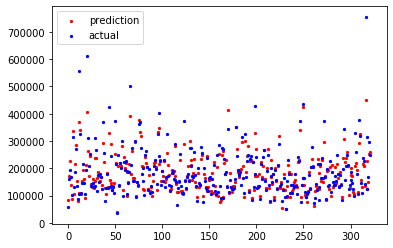

In [38]:
#Scatter Plot on Data
X=np.arange(t_xt)
plt.scatter(X,ht,color='r',s=5, label='prediction')
plt.scatter(X,yt,color='b',s=5, label='actual')
plt.legend()
plt.show()